In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline 
from datetime import date
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
import yfinance as yf

Downloading the data of all three Crypto pairs in between 17th September 2014 to 30th June 2022

In [7]:
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

today = date.today()

# dd/mm/YY
d1 = today.strftime("%Y-%m-%d")

# define coin symbols
crypto_symbols = ['BTC', 'ETH', 'USDT', 'USDC', 'BNB',
'BUSD', 'XRP', 'ADA', 'SOL', 'DOGE',
'DAI', 'DOT', 'HEX', 'TRX',
'SHIB', 'LEO', 'WBTC', 'AVAX', 'YOUC',
'MATIC', 'STETH', 'UNI1', 'LTC', 'FTT',
'LINK', 'CRO', 'XLM', 'NEAR', 'ATOM', 'WTRX']

for coins in crypto_symbols:
#   ticker.append(f'{coins}-USD')
    coin_set = yf.download([f'{coins}-USD'], start='2014-01-01', end=d1, interval='1d')
    coin_data = coin_set.copy().dropna()
    coin_data = coin_data.reset_index()
    coin_data_close = coin_data['Close']
    min_max_scaler = MinMaxScaler() #this returns values between 0.10

    close_price = np.array(coin_data_close).reshape(-1,1)
    scaled_close = min_max_scaler.fit_transform(close_price)

    ##splitting dataset into train and test split
    training_size=int(len(scaled_close)*0.75)
    test_size=len(scaled_close)-training_size
    train_data,test_data=scaled_close[0:training_size,:],scaled_close[training_size:len(scaled_close),:1]
    
    # reshape into X=t,t+1,t+2,t+3 and Y=t+4
    time_step = 100
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    
    # reshape input to be [samples, time steps, features] which is required for LSTM
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
    model.save(f'crypto_models/{coins}')
    
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
33/33 [==============================] - 34s 784ms/step - loss: 0.0013 - val_loss: 0.0127
Epoch 2/100
33/33 [==============================] - 17s 529ms/step - loss: 2.0195e-04 - val_loss: 0.0075
Epoch 3/100
33/33 [==============================] - 17s 529ms/step - loss: 1.6338e-04 - val_loss: 0.0150
Epoch 4/100
33/33 [==============================] - 17s 527ms/step - loss: 1.4052e-04 - val_loss: 0.0150
Epoch 5/100
33/33 [==============================] - 17s 529ms/step - loss: 1.3196e-04 - val_loss: 0.0247
Epoch 6/100
33/33 [==============================] - 18s 534ms/step - loss: 1.1590e-04 - val_loss: 0.0278
Epoch 7/100
33/33 [==============================] - 18s 559ms/step - loss: 1.0702e-04 - val_loss: 0.0413
Epoch 8/100
33/33 [==============================] - 17s 522ms/step - loss: 1.1280e-04 - val_loss: 0.0341
Epoch 9/100
33/33 [==============================] - 17s 521ms/step - loss: 1.0738e-04 

INFO:tensorflow:Assets written to: crypto_models/BTC\assets


INFO:tensorflow:Assets written to: crypto_models/BTC\assets


20/20 [==============================] - 2s 78ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 19s 681ms/step - loss: 0.0080 - val_loss: 0.0249
Epoch 2/100
19/19 [==============================] - 11s 594ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 3/100
19/19 [==============================] - 11s 593ms/step - loss: 0.0013 - val_loss: 0.0131
Epoch 4/100
19/19 [==============================] - 11s 588ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 5/100
19/19 [==============================] - 11s 593ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 6/100
19/19 [==============================] - 11s 596ms/step - loss: 0.0010 - val_loss: 0.0086
Epoch 7/100
19/19 [==============================] - 11s 603ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 8/100
19/19 [==============================] - 12s 621ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 9/100
19/19 [==============================] - 11s 598m

INFO:tensorflow:Assets written to: crypto_models/ETH\assets


INFO:tensorflow:Assets written to: crypto_models/ETH\assets


11/11 [==============================] - 1s 80ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 18s 651ms/step - loss: 0.0180 - val_loss: 6.0507e-05
Epoch 2/100
19/19 [==============================] - 11s 576ms/step - loss: 0.0023 - val_loss: 3.7127e-05
Epoch 3/100
19/19 [==============================] - 11s 573ms/step - loss: 0.0019 - val_loss: 6.9301e-05
Epoch 4/100
19/19 [==============================] - 11s 569ms/step - loss: 0.0019 - val_loss: 1.6418e-04
Epoch 5/100
19/19 [==============================] - 11s 570ms/step - loss: 0.0019 - val_loss: 1.0222e-04
Epoch 6/100
19/19 [==============================] - 11s 567ms/step - loss: 0.0018 - val_loss: 4.1931e-05
Epoch 7/100
19/19 [==============================] - 11s 570ms/step - loss: 0.0018 - val_loss: 2.2215e-05
Epoch 8/100
19/19 [==============================] - 11s 569ms/step - loss: 0.0018 - val_loss: 1.3107e-04
Epoch 9/100
19/19 [==========

INFO:tensorflow:Assets written to: crypto_models/USDT\assets


INFO:tensorflow:Assets written to: crypto_models/USDT\assets


11/11 [==============================] - 1s 80ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
15/15 [==============================] - 16s 593ms/step - loss: 0.0582 - val_loss: 0.0056
Epoch 2/100
15/15 [==============================] - 7s 480ms/step - loss: 0.0083 - val_loss: 0.0028
Epoch 3/100
15/15 [==============================] - 7s 487ms/step - loss: 0.0046 - val_loss: 5.5709e-04
Epoch 4/100
15/15 [==============================] - 7s 483ms/step - loss: 0.0042 - val_loss: 4.2828e-05
Epoch 5/100
15/15 [==============================] - 7s 483ms/step - loss: 0.0041 - val_loss: 5.3882e-05
Epoch 6/100
15/15 [==============================] - 7s 476ms/step - loss: 0.0040 - val_loss: 1.4276e-04
Epoch 7/100
15/15 [==============================] - 7s 479ms/step - loss: 0.0039 - val_loss: 2.6989e-05
Epoch 8/100
15/15 [==============================] - 7s 478ms/step - loss: 0.0039 - val_loss: 1.1961e-04
Epoch 9/100
15/15 [=========================

INFO:tensorflow:Assets written to: crypto_models/USDC\assets


INFO:tensorflow:Assets written to: crypto_models/USDC\assets


8/8 [==============================] - 1s 84ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 18s 654ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 2/100
19/19 [==============================] - 11s 599ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 3/100
19/19 [==============================] - 11s 588ms/step - loss: 0.0026 - val_loss: 0.0068
Epoch 4/100
19/19 [==============================] - 11s 596ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 5/100
19/19 [==============================] - 11s 577ms/step - loss: 0.0016 - val_loss: 0.0120
Epoch 6/100
19/19 [==============================] - 11s 588ms/step - loss: 0.0015 - val_loss: 0.0102
Epoch 7/100
19/19 [==============================] - 11s 568ms/step - loss: 0.0018 - val_loss: 0.0123
Epoch 8/100
19/19 [==============================] - 11s 598ms/step - loss: 0.0014 - val_loss: 0.0109
Epoch 9/100
19/19 [==============================] - 11s 577ms/

INFO:tensorflow:Assets written to: crypto_models/BNB\assets


INFO:tensorflow:Assets written to: crypto_models/BNB\assets


11/11 [==============================] - 1s 104ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
11/11 [==============================] - 17s 704ms/step - loss: 0.0415 - val_loss: 7.4865e-04
Epoch 2/100
11/11 [==============================] - 6s 528ms/step - loss: 0.0049 - val_loss: 8.3444e-04
Epoch 3/100
11/11 [==============================] - 6s 540ms/step - loss: 0.0026 - val_loss: 7.7598e-04
Epoch 4/100
11/11 [==============================] - 6s 547ms/step - loss: 0.0019 - val_loss: 3.5690e-04
Epoch 5/100
11/11 [==============================] - 6s 528ms/step - loss: 0.0017 - val_loss: 2.1495e-04
Epoch 6/100
11/11 [==============================] - 6s 525ms/step - loss: 0.0016 - val_loss: 1.2392e-04
Epoch 7/100
11/11 [==============================] - 6s 512ms/step - loss: 0.0016 - val_loss: 1.6705e-04
Epoch 8/100
11/11 [==============================] - 6s 508ms/step - loss: 0.0016 - val_loss: 1.3889e-04
Epoch 9/100
11/11 [================

INFO:tensorflow:Assets written to: crypto_models/BUSD\assets


INFO:tensorflow:Assets written to: crypto_models/BUSD\assets


6/6 [==============================] - 0s 76ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 19s 701ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 2/100
19/19 [==============================] - 12s 654ms/step - loss: 0.0013 - val_loss: 7.4814e-04
Epoch 3/100
19/19 [==============================] - 13s 677ms/step - loss: 0.0011 - val_loss: 5.6457e-04
Epoch 4/100
19/19 [==============================] - 12s 653ms/step - loss: 9.8608e-04 - val_loss: 7.8773e-04
Epoch 5/100
19/19 [==============================] - 12s 642ms/step - loss: 8.5931e-04 - val_loss: 4.4664e-04
Epoch 6/100
19/19 [==============================] - 12s 632ms/step - loss: 8.1484e-04 - val_loss: 4.5677e-04
Epoch 7/100
19/19 [==============================] - 12s 629ms/step - loss: 8.5206e-04 - val_loss: 4.2413e-04
Epoch 8/100
19/19 [==============================] - 12s 647ms/step - loss: 7.2092e-04 - val_loss: 3.9251e-04
Epoch 9/100
19/

INFO:tensorflow:Assets written to: crypto_models/XRP\assets


INFO:tensorflow:Assets written to: crypto_models/XRP\assets


11/11 [==============================] - 1s 79ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 19s 714ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 2/100
19/19 [==============================] - 10s 518ms/step - loss: 0.0011 - val_loss: 0.0192
Epoch 3/100
19/19 [==============================] - 10s 517ms/step - loss: 8.5205e-04 - val_loss: 0.0036
Epoch 4/100
19/19 [==============================] - 10s 530ms/step - loss: 6.6023e-04 - val_loss: 0.0023
Epoch 5/100
19/19 [==============================] - 10s 518ms/step - loss: 7.4646e-04 - val_loss: 0.0026
Epoch 6/100
19/19 [==============================] - 10s 517ms/step - loss: 6.1860e-04 - val_loss: 0.0043
Epoch 7/100
19/19 [==============================] - 10s 539ms/step - loss: 5.9690e-04 - val_loss: 0.0020
Epoch 8/100
19/19 [==============================] - 10s 520ms/step - loss: 6.4030e-04 - val_loss: 0.0051
Epoch 9/100
19/19 [==================

INFO:tensorflow:Assets written to: crypto_models/ADA\assets


INFO:tensorflow:Assets written to: crypto_models/ADA\assets


11/11 [==============================] - 1s 80ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
9/9 [==============================] - 13s 793ms/step - loss: 0.0605 - val_loss: 0.0416
Epoch 2/100
9/9 [==============================] - 6s 637ms/step - loss: 0.0126 - val_loss: 0.0011
Epoch 3/100
9/9 [==============================] - 6s 634ms/step - loss: 0.0057 - val_loss: 0.0117
Epoch 4/100
9/9 [==============================] - 5s 589ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 5/100
9/9 [==============================] - 6s 603ms/step - loss: 0.0041 - val_loss: 0.0102
Epoch 6/100
9/9 [==============================] - 6s 645ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 7/100
9/9 [==============================] - 6s 642ms/step - loss: 0.0032 - val_loss: 0.0096
Epoch 8/100
9/9 [==============================] - 6s 622ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 9/100
9/9 [==============================] - 5s 580ms/step - loss: 0.0030 - va

INFO:tensorflow:Assets written to: crypto_models/SOL\assets


INFO:tensorflow:Assets written to: crypto_models/SOL\assets


4/4 [==============================] - 0s 84ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 20s 745ms/step - loss: 0.0066 - val_loss: 0.0015
Epoch 2/100
19/19 [==============================] - 13s 668ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 3/100
19/19 [==============================] - 13s 693ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 4/100
19/19 [==============================] - 13s 697ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/100
19/19 [==============================] - 12s 637ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 6/100
19/19 [==============================] - 13s 662ms/step - loss: 0.0017 - val_loss: 7.9288e-04
Epoch 7/100
19/19 [==============================] - 12s 651ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 8/100
19/19 [==============================] - 12s 646ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 9/100
19/19 [==============================] - 12s 64

INFO:tensorflow:Assets written to: crypto_models/DOGE\assets


INFO:tensorflow:Assets written to: crypto_models/DOGE\assets


11/11 [==============================] - 1s 89ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
10/10 [==============================] - 14s 755ms/step - loss: 0.0439 - val_loss: 0.0072
Epoch 2/100
10/10 [==============================] - 6s 569ms/step - loss: 0.0070 - val_loss: 1.6381e-04
Epoch 3/100
10/10 [==============================] - 6s 598ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 4/100
10/10 [==============================] - 6s 649ms/step - loss: 0.0040 - val_loss: 1.0649e-04
Epoch 5/100
10/10 [==============================] - 6s 605ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 6/100
10/10 [==============================] - 6s 608ms/step - loss: 0.0038 - val_loss: 2.1372e-04
Epoch 7/100
10/10 [==============================] - 6s 595ms/step - loss: 0.0039 - val_loss: 6.6942e-04
Epoch 8/100
10/10 [==============================] - 6s 596ms/step - loss: 0.0038 - val_loss: 2.4366e-04
Epoch 9/100
10/10 [=============================

INFO:tensorflow:Assets written to: crypto_models/DAI\assets


INFO:tensorflow:Assets written to: crypto_models/DAI\assets


5/5 [==============================] - 2s 85ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
7/7 [==============================] - 13s 910ms/step - loss: 0.1092 - val_loss: 0.0420
Epoch 2/100
7/7 [==============================] - 5s 707ms/step - loss: 0.0241 - val_loss: 0.0050
Epoch 3/100
7/7 [==============================] - 5s 657ms/step - loss: 0.0187 - val_loss: 0.0200
Epoch 4/100
7/7 [==============================] - 5s 659ms/step - loss: 0.0148 - val_loss: 0.0119
Epoch 5/100
7/7 [==============================] - 5s 685ms/step - loss: 0.0129 - val_loss: 0.0080
Epoch 6/100
7/7 [==============================] - 4s 619ms/step - loss: 0.0113 - val_loss: 0.0096
Epoch 7/100
7/7 [==============================] - 5s 649ms/step - loss: 0.0109 - val_loss: 0.0040
Epoch 8/100
7/7 [==============================] - 4s 636ms/step - loss: 0.0100 - val_loss: 0.0050
Epoch 9/100
7/7 [==============================] - 4s 644ms/step - loss: 0.0099 - val_

INFO:tensorflow:Assets written to: crypto_models/DOT\assets


INFO:tensorflow:Assets written to: crypto_models/DOT\assets


3/3 [==============================] - 0s 82ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
10/10 [==============================] - 18s 756ms/step - loss: 0.0381 - val_loss: 0.0097
Epoch 2/100
10/10 [==============================] - 5s 545ms/step - loss: 0.0072 - val_loss: 0.0030
Epoch 3/100
10/10 [==============================] - 6s 558ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 4/100
10/10 [==============================] - 6s 568ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 5/100
10/10 [==============================] - 6s 567ms/step - loss: 0.0024 - val_loss: 0.0060
Epoch 6/100
10/10 [==============================] - 6s 554ms/step - loss: 0.0021 - val_loss: 0.0064
Epoch 7/100
10/10 [==============================] - 5s 552ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 8/100
10/10 [==============================] - 6s 564ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 9/100
10/10 [==============================] - 6s 572ms/step - l

INFO:tensorflow:Assets written to: crypto_models/HEX\assets


INFO:tensorflow:Assets written to: crypto_models/HEX\assets


5/5 [==============================] - 0s 85ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 22s 782ms/step - loss: 0.0092 - val_loss: 0.0036
Epoch 2/100
19/19 [==============================] - 13s 685ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 13s 678ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
19/19 [==============================] - 13s 707ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/100
19/19 [==============================] - 13s 701ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 6/100
19/19 [==============================] - 14s 715ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 7/100
19/19 [==============================] - 13s 682ms/step - loss: 0.0013 - val_loss: 9.2446e-04
Epoch 8/100
19/19 [==============================] - 13s 697ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
19/19 [==============================] - 13s 68

INFO:tensorflow:Assets written to: crypto_models/TRX\assets


INFO:tensorflow:Assets written to: crypto_models/TRX\assets


11/11 [==============================] - 1s 107ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
8/8 [==============================] - 16s 1s/step - loss: 0.0325 - val_loss: 0.0115
Epoch 2/100
8/8 [==============================] - 6s 781ms/step - loss: 0.0114 - val_loss: 0.0010
Epoch 3/100
8/8 [==============================] - 6s 692ms/step - loss: 0.0092 - val_loss: 0.0016
Epoch 4/100
8/8 [==============================] - 6s 730ms/step - loss: 0.0072 - val_loss: 4.4500e-04
Epoch 5/100
8/8 [==============================] - 6s 702ms/step - loss: 0.0070 - val_loss: 5.0412e-04
Epoch 6/100
8/8 [==============================] - 5s 610ms/step - loss: 0.0075 - val_loss: 4.2617e-04
Epoch 7/100
8/8 [==============================] - 5s 679ms/step - loss: 0.0059 - val_loss: 9.1724e-04
Epoch 8/100
8/8 [==============================] - 5s 629ms/step - loss: 0.0057 - val_loss: 3.3822e-04
Epoch 9/100
8/8 [==============================] - 5s 588ms/step -

INFO:tensorflow:Assets written to: crypto_models/SHIB\assets


INFO:tensorflow:Assets written to: crypto_models/SHIB\assets


3/3 [==============================] - 0s 112ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
13/13 [==============================] - 17s 741ms/step - loss: 0.0057 - val_loss: 0.0381
Epoch 2/100
13/13 [==============================] - 8s 604ms/step - loss: 0.0012 - val_loss: 0.0161
Epoch 3/100
13/13 [==============================] - 8s 600ms/step - loss: 7.4468e-04 - val_loss: 0.0150
Epoch 4/100
13/13 [==============================] - 8s 598ms/step - loss: 6.8239e-04 - val_loss: 0.0110
Epoch 5/100
13/13 [==============================] - 8s 594ms/step - loss: 6.7274e-04 - val_loss: 0.0165
Epoch 6/100
13/13 [==============================] - 8s 599ms/step - loss: 6.6333e-04 - val_loss: 0.0192
Epoch 7/100
13/13 [==============================] - 8s 595ms/step - loss: 6.4536e-04 - val_loss: 0.0212
Epoch 8/100
13/13 [==============================] - 8s 603ms/step - loss: 6.1891e-04 - val_loss: 0.0153
Epoch 9/100
13/13 [==========================

INFO:tensorflow:Assets written to: crypto_models/LEO\assets


INFO:tensorflow:Assets written to: crypto_models/LEO\assets


7/7 [==============================] - 1s 83ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
14/14 [==============================] - 19s 950ms/step - loss: 0.0288 - val_loss: 0.0093
Epoch 2/100
14/14 [==============================] - 10s 675ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 3/100
14/14 [==============================] - 9s 649ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 4/100
14/14 [==============================] - 9s 659ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 5/100
14/14 [==============================] - 9s 647ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 6/100
14/14 [==============================] - 9s 637ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 7/100
14/14 [==============================] - 9s 669ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 8/100
14/14 [==============================] - 9s 640ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 9/100
14/14 [==============================] - 9s 681ms/step - 

INFO:tensorflow:Assets written to: crypto_models/WBTC\assets


INFO:tensorflow:Assets written to: crypto_models/WBTC\assets


7/7 [==============================] - 1s 99ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
7/7 [==============================] - 12s 761ms/step - loss: 0.1015 - val_loss: 0.0282
Epoch 2/100
7/7 [==============================] - 4s 510ms/step - loss: 0.0219 - val_loss: 0.0045
Epoch 3/100
7/7 [==============================] - 4s 517ms/step - loss: 0.0170 - val_loss: 0.0045
Epoch 4/100
7/7 [==============================] - 4s 515ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 5/100
7/7 [==============================] - 4s 512ms/step - loss: 0.0088 - val_loss: 0.0014
Epoch 6/100
7/7 [==============================] - 4s 519ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 7/100
7/7 [==============================] - 4s 509ms/step - loss: 0.0085 - val_loss: 0.0018
Epoch 8/100
7/7 [==============================] - 4s 509ms/step - loss: 0.0077 - val_loss: 0.0021
Epoch 9/100
7/7 [==============================] - 4s 504ms/step - loss: 0.0074 - val_

INFO:tensorflow:Assets written to: crypto_models/AVAX\assets


INFO:tensorflow:Assets written to: crypto_models/AVAX\assets


3/3 [==============================] - 0s 75ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
7/7 [==============================] - 12s 847ms/step - loss: 0.0299 - val_loss: 0.0139
Epoch 2/100
7/7 [==============================] - 4s 585ms/step - loss: 0.0074 - val_loss: 0.1837
Epoch 3/100
7/7 [==============================] - 4s 615ms/step - loss: 0.0054 - val_loss: 0.0309
Epoch 4/100
7/7 [==============================] - 4s 607ms/step - loss: 0.0039 - val_loss: 0.0442
Epoch 5/100
7/7 [==============================] - 4s 596ms/step - loss: 0.0032 - val_loss: 0.0178
Epoch 6/100
7/7 [==============================] - 4s 608ms/step - loss: 0.0029 - val_loss: 0.0153
Epoch 7/100
7/7 [==============================] - 4s 584ms/step - loss: 0.0026 - val_loss: 0.0227
Epoch 8/100
7/7 [==============================] - 4s 598ms/step - loss: 0.0026 - val_loss: 0.0299
Epoch 9/100
7/7 [==============================] - 4s 633ms/step - loss: 0.0025 - val_

INFO:tensorflow:Assets written to: crypto_models/YOUC\assets


INFO:tensorflow:Assets written to: crypto_models/YOUC\assets


3/3 [==============================] - 0s 70ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
13/13 [==============================] - 19s 949ms/step - loss: 0.0165 - val_loss: 0.0072
Epoch 2/100
13/13 [==============================] - 9s 669ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 3/100
13/13 [==============================] - 9s 672ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 4/100
13/13 [==============================] - 8s 623ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 5/100
13/13 [==============================] - 8s 651ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 6/100
13/13 [==============================] - 9s 679ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 7/100
13/13 [==============================] - 8s 640ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 8/100
13/13 [==============================] - 9s 675ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 9/100
13/13 [==============================] - 8s 652ms/step - l

INFO:tensorflow:Assets written to: crypto_models/MATIC\assets


INFO:tensorflow:Assets written to: crypto_models/MATIC\assets


7/7 [==============================] - 1s 96ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
6/6 [==============================] - 15s 940ms/step - loss: 0.1114 - val_loss: 0.0391
Epoch 2/100
6/6 [==============================] - 4s 593ms/step - loss: 0.0294 - val_loss: 0.0045
Epoch 3/100
6/6 [==============================] - 4s 611ms/step - loss: 0.0250 - val_loss: 0.0142
Epoch 4/100
6/6 [==============================] - 4s 636ms/step - loss: 0.0169 - val_loss: 0.0244
Epoch 5/100
6/6 [==============================] - 4s 648ms/step - loss: 0.0128 - val_loss: 0.0101
Epoch 6/100
6/6 [==============================] - 4s 607ms/step - loss: 0.0137 - val_loss: 0.0142
Epoch 7/100
6/6 [==============================] - 4s 586ms/step - loss: 0.0113 - val_loss: 0.0167
Epoch 8/100
6/6 [==============================] - 4s 582ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 9/100
6/6 [==============================] - 4s 613ms/step - loss: 0.0106 - val_

INFO:tensorflow:Assets written to: crypto_models/STETH\assets


INFO:tensorflow:Assets written to: crypto_models/STETH\assets


2/2 [==============================] - 0s 76ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
7/7 [==============================] - 12s 801ms/step - loss: 0.1401 - val_loss: 0.0218
Epoch 2/100
7/7 [==============================] - 4s 590ms/step - loss: 0.0281 - val_loss: 0.0068
Epoch 3/100
7/7 [==============================] - 4s 577ms/step - loss: 0.0192 - val_loss: 0.0135
Epoch 4/100
7/7 [==============================] - 4s 542ms/step - loss: 0.0138 - val_loss: 0.0198
Epoch 5/100
7/7 [==============================] - 4s 531ms/step - loss: 0.0111 - val_loss: 0.0094
Epoch 6/100
7/7 [==============================] - 4s 541ms/step - loss: 0.0111 - val_loss: 0.0121
Epoch 7/100
7/7 [==============================] - 4s 601ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 8/100
7/7 [==============================] - 4s 509ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 9/100
7/7 [==============================] - 3s 491ms/step - loss: 0.0085 - val_

INFO:tensorflow:Assets written to: crypto_models/UNI1\assets


INFO:tensorflow:Assets written to: crypto_models/UNI1\assets


3/3 [==============================] - 0s 79ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
33/33 [==============================] - 28s 660ms/step - loss: 0.0065 - val_loss: 0.0094
Epoch 2/100
33/33 [==============================] - 20s 607ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 3/100
33/33 [==============================] - 20s 617ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 4/100
33/33 [==============================] - 21s 626ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 5/100
33/33 [==============================] - 20s 609ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 6/100
33/33 [==============================] - 20s 601ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 7/100
33/33 [==============================] - 20s 622ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/100
33/33 [==============================] - 20s 605ms/step - loss: 7.8448e-04 - val_loss: 0.0034
Epoch 9/100
33/33 [==============================] - 20s 60

INFO:tensorflow:Assets written to: crypto_models/LTC\assets


INFO:tensorflow:Assets written to: crypto_models/LTC\assets


20/20 [==============================] - 2s 86ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
12/12 [==============================] - 15s 656ms/step - loss: 0.0343 - val_loss: 0.0083
Epoch 2/100
12/12 [==============================] - 6s 509ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 3/100
12/12 [==============================] - 6s 514ms/step - loss: 0.0051 - val_loss: 0.0081
Epoch 4/100
12/12 [==============================] - 6s 533ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 6s 525ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 6s 517ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 6s 512ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 6s 514ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 6s 510ms/step -

INFO:tensorflow:Assets written to: crypto_models/FTT\assets


INFO:tensorflow:Assets written to: crypto_models/FTT\assets


6/6 [==============================] - 1s 83ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 19s 697ms/step - loss: 0.0098 - val_loss: 0.0135
Epoch 2/100
19/19 [==============================] - 12s 649ms/step - loss: 0.0027 - val_loss: 0.0076
Epoch 3/100
19/19 [==============================] - 12s 628ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 4/100
19/19 [==============================] - 12s 619ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 5/100
19/19 [==============================] - 12s 621ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 6/100
19/19 [==============================] - 12s 625ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 7/100
19/19 [==============================] - 12s 627ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 8/100
19/19 [==============================] - 12s 629ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/100
19/19 [==============================] - 12s 624ms/

INFO:tensorflow:Assets written to: crypto_models/LINK\assets


INFO:tensorflow:Assets written to: crypto_models/LINK\assets


11/11 [==============================] - 1s 97ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
15/15 [==============================] - 17s 627ms/step - loss: 0.0026 - val_loss: 0.0183
Epoch 2/100
15/15 [==============================] - 8s 520ms/step - loss: 6.2290e-04 - val_loss: 0.0038
Epoch 3/100
15/15 [==============================] - 8s 520ms/step - loss: 4.0170e-04 - val_loss: 0.0034
Epoch 4/100
15/15 [==============================] - 8s 519ms/step - loss: 3.2440e-04 - val_loss: 0.0035
Epoch 5/100
15/15 [==============================] - 8s 507ms/step - loss: 3.0347e-04 - val_loss: 0.0030
Epoch 6/100
15/15 [==============================] - 8s 518ms/step - loss: 2.7118e-04 - val_loss: 0.0026
Epoch 7/100
15/15 [==============================] - 8s 541ms/step - loss: 2.5390e-04 - val_loss: 0.0025
Epoch 8/100
15/15 [==============================] - 8s 554ms/step - loss: 2.3268e-04 - val_loss: 0.0040
Epoch 9/100
15/15 [=====================

INFO:tensorflow:Assets written to: crypto_models/CRO\assets


INFO:tensorflow:Assets written to: crypto_models/CRO\assets


8/8 [==============================] - 1s 92ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
19/19 [==============================] - 19s 699ms/step - loss: 0.0121 - val_loss: 0.0017
Epoch 2/100
19/19 [==============================] - 12s 619ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 3/100
19/19 [==============================] - 12s 622ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 4/100
19/19 [==============================] - 12s 613ms/step - loss: 0.0026 - val_loss: 8.3595e-04
Epoch 5/100
19/19 [==============================] - 12s 615ms/step - loss: 0.0024 - val_loss: 9.2391e-04
Epoch 6/100
19/19 [==============================] - 13s 667ms/step - loss: 0.0024 - val_loss: 7.2846e-04
Epoch 7/100
19/19 [==============================] - 12s 619ms/step - loss: 0.0021 - val_loss: 6.7965e-04
Epoch 8/100
19/19 [==============================] - 12s 616ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 9/100
19/19 [============================

INFO:tensorflow:Assets written to: crypto_models/XLM\assets


INFO:tensorflow:Assets written to: crypto_models/XLM\assets


11/11 [==============================] - 1s 84ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
7/7 [==============================] - 12s 763ms/step - loss: 0.0707 - val_loss: 0.0787
Epoch 2/100
7/7 [==============================] - 4s 509ms/step - loss: 0.0290 - val_loss: 8.1284e-04
Epoch 3/100
7/7 [==============================] - 4s 524ms/step - loss: 0.0228 - val_loss: 0.0015
Epoch 4/100
7/7 [==============================] - 4s 524ms/step - loss: 0.0113 - val_loss: 0.0155
Epoch 5/100
7/7 [==============================] - 4s 516ms/step - loss: 0.0110 - val_loss: 0.0042
Epoch 6/100
7/7 [==============================] - 4s 545ms/step - loss: 0.0089 - val_loss: 0.0023
Epoch 7/100
7/7 [==============================] - 4s 539ms/step - loss: 0.0078 - val_loss: 0.0044
Epoch 8/100
7/7 [==============================] - 4s 520ms/step - loss: 0.0075 - val_loss: 0.0017
Epoch 9/100
7/7 [==============================] - 4s 538ms/step - loss: 0.0084 

INFO:tensorflow:Assets written to: crypto_models/NEAR\assets


INFO:tensorflow:Assets written to: crypto_models/NEAR\assets


3/3 [==============================] - 0s 56ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
13/13 [==============================] - 16s 786ms/step - loss: 0.0226 - val_loss: 0.0145
Epoch 2/100
13/13 [==============================] - 9s 666ms/step - loss: 0.0058 - val_loss: 0.0237
Epoch 3/100
13/13 [==============================] - 9s 668ms/step - loss: 0.0041 - val_loss: 0.0211
Epoch 4/100
13/13 [==============================] - 9s 688ms/step - loss: 0.0035 - val_loss: 0.0091
Epoch 5/100
13/13 [==============================] - 9s 672ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 6/100
13/13 [==============================] - 9s 716ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 7/100
13/13 [==============================] - 9s 701ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 8/100
13/13 [==============================] - 9s 676ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 9/100
13/13 [==============================] - 9s 666ms/step - l

INFO:tensorflow:Assets written to: crypto_models/ATOM\assets


INFO:tensorflow:Assets written to: crypto_models/ATOM\assets


7/7 [==============================] - 1s 94ms/step
[*********************100%***********************]  1 of 1 completed


IndexError: tuple index out of range

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pickle

crypto_symbols = ['BTC', 'ETH', 'USDT', 'USDC', 'BNB',
'BUSD', 'XRP', 'ADA', 'SOL', 'DOGE',
'DAI', 'DOT', 'WTRX', 'HEX', 'TRX',
'SHIB', 'LEO', 'WBTC', 'AVAX', 'YOUC',
'MATIC', 'STETH', 'UNI1', 'LTC', 'FTT',
'LINK', 'CRO', 'XLM', 'NEAR', 'ATOM']

today = date.today()

# dd/mm/YY
d1 = today.strftime("%Y/%m/%d")

for coin in crypto_symbols:
    coin_set = yf.download([f'{coin}-USD'], start="2013-09-17", end=today)
    coin_set2 = coin_set.copy().dropna()

    predict = ['Close_Predict', 'Open_Predict', 'High_Predict', 
    'Low_Predict', 'Volume_Predict']
    projection = 7
    coin_set2['Close_Predict']=coin_set2[['Close']].shift(-projection)
    coin_set2['Open_Predict']=coin_set2[['Open']].shift(-projection)
    coin_set2['High_Predict']=coin_set2[['High']].shift(-projection)
    coin_set2['Low_Predict']=coin_set2[['Low']].shift(-projection)
    coin_set2['Volume_Predict']=coin_set2[['Volume']].shift(-projection)

    coin_set3 = coin_set2.tail(projection)
    coin_set3 = np.array(coin_set3[['Open','High','Low','Close','Volume']])

    #Creating the dataset based on the Independent variable X as numpy array
    X = np.array(coin_set2[['Open','High','Low','Close','Volume']])
    X = X[:-projection]

    predic_result = {}

    for pred in predict:
        y = np.array(coin_set2[pred])
        y = y[:-projection]

        #Spliting the dataset into 80% training and 20% testing datasets
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
        xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
        xg_reg.fit(X_train, y_train)
        y_pred = xg_reg.predict(X_test)

        predic_result[pred] = xg_reg.predict(coin_set3)

    output = pd.DataFrame(predic_result).to_csv(f'crypto_models/{coin}-USD_result_{today}.csv')

    # Saving model to disk
    pickle.dump(xg_reg, open(f'crypto_models/{coin}-USD_model_{today}.pkl','wb'))

    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [17]:
set1 = yf.download(['ETH-USD'], start="2013-09-17", end=today)
set2 = coin_set.copy().dropna()


projection = 30
set2['Close_Predict']=coin_set2[['Close']].shift(-projection)
set2['Open_Predict']=coin_set2[['Open']].shift(-projection)
set2['High_Predict']=coin_set2[['High']].shift(-projection)
set2['Low_Predict']=coin_set2[['Low']].shift(-projection)
set2['Volume_Predict']=coin_set2[['Volume']].shift(-projection)

set3 = set2.tail(projection)
set3 = np.array(set3[['Open','High','Low','Close','Volume']])
set3

[*********************100%***********************]  1 of 1 completed


array([[6.32712603e+00, 6.57379007e+00, 6.28331423e+00, 6.39219093e+00,
        1.58842638e+08],
       [6.39105606e+00, 6.49421787e+00, 5.58881712e+00, 6.08269978e+00,
        2.32265574e+08],
       [6.07912111e+00, 6.81902122e+00, 5.89397192e+00, 6.77089024e+00,
        2.41234606e+08],
       [6.76920319e+00, 6.94835711e+00, 6.50927591e+00, 6.81211996e+00,
        1.84516560e+08],
       [6.81038523e+00, 7.16367388e+00, 6.68894100e+00, 6.92895412e+00,
        1.88461410e+08],
       [6.93405008e+00, 7.56142378e+00, 6.60241795e+00, 7.07468414e+00,
        3.71903028e+08],
       [7.07436419e+00, 8.15135956e+00, 7.07332420e+00, 8.14293957e+00,
        4.43262069e+08],
       [8.13779354e+00, 8.50174332e+00, 7.98842001e+00, 8.27886677e+00,
        3.49099080e+08],
       [8.27885246e+00, 8.68225193e+00, 8.03966618e+00, 8.65573883e+00,
        2.70454488e+08],
       [8.65433121e+00, 8.73576546e+00, 8.04172802e+00, 8.04457092e+00,
        2.63021151e+08],
       [8.04585075e+00, 8.5594

In [11]:
coin_set2
X

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-14,6.439715,6.639943,6.353963,6.526642,7318172
2019-03-15,6.633174,7.715249,6.432468,7.504351,6057301
2019-03-16,7.507990,8.305615,6.694531,7.383882,3477393
2019-03-17,7.357443,7.357443,4.727895,4.776164,2653565
2019-03-18,4.828242,5.229982,4.828242,5.110341,2567201
...,...,...,...,...,...
2022-07-12,8.194923,8.384569,7.745732,7.804078,203896723
2022-07-13,7.806161,8.208751,7.444185,8.208751,234574531
2022-07-14,8.204885,9.024354,8.111207,8.974957,312197850


In [16]:
Crypto_Port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2860 entries, 2014-09-17 to 2022-07-16
Freq: D
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  2860 non-null   float64
 1   (Adj Close, ETH-USD)  1711 non-null   float64
 2   (Adj Close, LTC-USD)  2860 non-null   float64
 3   (Close, BTC-USD)      2860 non-null   float64
 4   (Close, ETH-USD)      1711 non-null   float64
 5   (Close, LTC-USD)      2860 non-null   float64
 6   (High, BTC-USD)       2860 non-null   float64
 7   (High, ETH-USD)       1711 non-null   float64
 8   (High, LTC-USD)       2860 non-null   float64
 9   (Low, BTC-USD)        2860 non-null   float64
 10  (Low, ETH-USD)        1711 non-null   float64
 11  (Low, LTC-USD)        2860 non-null   float64
 12  (Open, BTC-USD)       2860 non-null   float64
 13  (Open, ETH-USD)       1711 non-null   float64
 14  (Open, LTC-USD)       2860 non-null   float64


Saving the cryptocurrency data in the Crypto_Port variable as as CSV (Comma Seperate Value) file. 

In [6]:
Crypto_Port.to_csv("Crypto_Port.csv")

In [7]:
Crypto_Port = pd.read_csv("Crypto_Port.csv")

In [8]:
Crypto_Port

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaN,BTC-USD,ETH-USD,LTC-USD,BTC-USD,ETH-USD,LTC-USD,BTC-USD,ETH-USD,LTC-USD,BTC-USD,ETH-USD,LTC-USD,BTC-USD,ETH-USD,LTC-USD,BTC-USD,ETH-USD,LTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,NaN,5.058549880981445,457.3340148925781,NaN,5.058549880981445,468.17401123046875,NaN,5.170770168304443,452.4219970703125,NaN,4.965950012207031,465.864013671875,NaN,5.08588981628418,21056800,NaN,3071840
3,2014-09-18,424.44000244140625,NaN,4.685229778289795,424.44000244140625,NaN,4.685229778289795,456.8599853515625,NaN,5.065430164337158,413.10400390625,NaN,4.579959869384766,456.8599853515625,NaN,5.065430164337158,34483200,NaN,4569260
4,2014-09-19,394.7959899902344,NaN,4.327770233154297,394.7959899902344,NaN,4.327770233154297,427.8349914550781,NaN,4.755819797515869,384.5320129394531,NaN,4.254350185394287,424.1029968261719,NaN,4.687290191650391,37919700,NaN,3917450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,2022-06-26,21027.294921875,1199.8316650390625,56.87614440917969,21027.294921875,1199.8316650390625,56.87614440917969,21783.724609375,1272.1312255859375,60.300819396972656,21016.26953125,1199.4063720703125,56.87559509277344,21496.494140625,1242.987548828125,58.955406188964844,18027170497,12096607824.0,486759815
2842,2022-06-27,20735.478515625,1193.6806640625,55.92555618286133,20735.478515625,1193.6806640625,55.92555618286133,21478.08984375,1234.1807861328125,58.51468276977539,20620.19921875,1179.79248046875,55.249855041503906,21028.23828125,1199.713134765625,56.86295700073242,20965695707,12492225250.0,456437012
2843,2022-06-28,20280.634765625,1144.5792236328125,52.81161117553711,20280.634765625,1144.5792236328125,52.81161117553711,21164.423828125,1229.739013671875,56.72005081176758,20228.8125,1141.15966796875,52.752288818359375,20731.544921875,1193.2540283203125,55.91389083862305,21381535161,14023205651.0,519374670
2844,2022-06-29,20104.0234375,1098.94384765625,53.42253875732422,20104.0234375,1098.94384765625,53.42253875732422,20364.15625,1152.684814453125,54.23308181762695,19937.791015625,1092.09912109375,51.790496826171875,20281.169921875,1144.5244140625,52.80720138549805,23552740328,15386286815.0,557459009


Importing the data from the Crypto_Port.csv file back into Crypto_Port variable with dates being the index column 

In [1]:
Crypto_Port2 = pd.read_csv("Crypto_Port.csv", header = [0,1], index_col=[0], parse_dates = [0])

NameError: name 'pd' is not defined

Pulling out more information using the describe() function

In [11]:
Crypto_Port2.describe()

Adj Close                                   Close               \
            BTC-USD      ETH-USD      LTC-USD       BTC-USD      ETH-USD   
count   2844.000000  1695.000000  2844.000000   2844.000000  1695.000000   
mean   12422.233886  1099.738397    67.401271  12422.233886  1099.738397   
std    16595.044603  1245.069868    69.570497  16595.044603  1245.069868   
min      178.102997    84.308296     1.157010    178.102997    84.308296   
25%      632.335251   201.911812     3.942395    632.335251   201.911812   
50%     6547.295166   423.669312    49.604229   6547.295166   423.669312   
75%    11489.900146  1871.499451   104.968313  11489.900146  1871.499451   
max    67566.828125  4812.087402   386.450775  67566.828125  4812.087402   

                            High                                     Low  \
           LTC-USD       BTC-USD      ETH-USD      LTC-USD       BTC-USD   
count  2844.000000   2844.000000  1695.000000  2844.000000   2844.000000   
mean     67.401271  12740.147621  1135.732180    70.097566  12053.700606   
std      69.570497  17028.421279  1283.913847    73.079538  16101.873540   
min       1.157010    211.731003    85.342743     1.344810    171.509995   
25%       3.942395    641.147736   206.291725     4.015915    621.927261   
50%      49.604229   6643.439941   435.457001    51.326406   6449.304932   
75%     104.968313  11791.881592  1948.870605   108.129725  11225.209473   
max     386.450775  68789.625000  4891.704590   412.960144  66382.062500   

                                         Open                            \
           ETH-USD      LTC-USD       BTC-USD      ETH-USD      LTC-USD   
count  1695.000000  2844.000000   2844.000000  1695.000000  2844.000000   
mean   1057.752523    64.442875  12417.091835  1099.552493    67.404216   
std    1201.267838    65.778696  16599.725375  1245.731378    69.616900   
min      82.829887     1.113740    176.897003    84.279694     1.153240   
25%     196.447502     3.877715    630.784515   201.867546     3.944493   
50%     407.851715    47.784416   6548.199951   422.587006    49.570601   
75%    1794.161377   100.633686  11487.965820  1872.685181   104.954123   
max    4718.039062   345.298828  67549.734375  4810.071289   387.869171   

             Volume                              
            BTC-USD       ETH-USD       LTC-USD  
count  2.844000e+03  1.695000e+03  2.844000e+03  
mean   1.540798e+10  1.279550e+10  1.547561e+09  
std    1.993426e+10  1.112210e+10  2.262441e+09  
min    5.914570e+06  6.217330e+08  4.817140e+05  
25%    8.610942e+07  3.711635e+09  4.127570e+06  
50%    5.782325e+09  1.030311e+10  4.854375e+08  
75%    2.625181e+10  1.818402e+10  2.508535e+09  
max    3.509679e+11  8.448291e+10  1.799426e+10

Dropping the "NAN" (Not A Number) values from the "Close" column

In [12]:
CryptoClose = Crypto_Port2.loc[:,"Close"].copy().dropna()CryptoClose.to_csv("CryptoClose.csv")

In [13]:
CryptoClose

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2017-11-09,7143.580078,320.884003,64.269699
2017-11-10,6618.140137,299.252991,59.260101
2017-11-11,6357.600098,314.681000,62.303299
2017-11-12,5950.069824,307.907990,59.005402
2017-11-13,6559.490234,316.716003,61.396500
...,...,...,...
2022-06-26,21027.294922,1199.831665,56.876144
2022-06-27,20735.478516,1193.680664,55.925556
2022-06-28,20280.634766,1144.579224,52.811611


Saving the data inside the CryptoClose Variable in a new csv file naming it CryptoClose.csv


In [14]:
CryptoClose.to_csv("CryptoClose.csv")

Plotting the data stored in CryptoClose variable

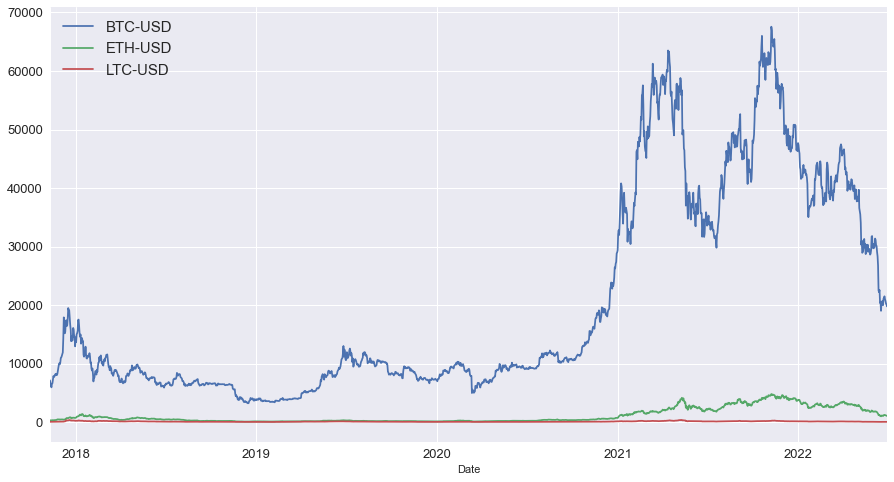

In [15]:
CryptoClose.plot(figsize = (15,8) , fontsize = 13)
plt.legend(fontsize = 15)
plt.show()

In [16]:
CryptoClose = pd.read_csv("CryptoClose.csv")

Reading the CrptoClose CSV file and storing it to the close variable with dates as the index column

In [17]:
close = pd.read_csv("CryptoClose.csv", index_col=[0],parse_dates=[0])

selecting the BTC-USD column (column index = 0), converting it into a dataframe and putting it equal to btc variable

In [18]:
btc =  close.iloc[:,0].copy().to_frame()

In [19]:
btc

,BTC-USD
Date,
2017-11-09,7143.580078
2017-11-10,6618.140137
2017-11-11,6357.600098
2017-11-12,5950.069824
2017-11-13,6559.490234
...,...
2022-06-26,21027.294922
2022-06-27,20735.478516
2022-06-28,20280.634766


Calculating the percent change and dropping the NAN (Not A Number) values simultaneously

In [20]:
btc.pct_change().dropna()

,BTC-USD
Date,
2017-11-10,-0.073554
2017-11-11,-0.039368
2017-11-12,-0.064101
2017-11-13,0.102422
2017-11-14,0.011626
...,...
2022-06-26,-0.022093
2022-06-27,-0.013878
2022-06-28,-0.021936


Setting up the return variable holding the returns from bitcoin usd crypto pair and reading the first five rows stored in the ret variable

In [21]:
ret = btc.pct_change().dropna()
ret.head()

,BTC-USD
Date,
2017-11-10,-0.073554
2017-11-11,-0.039368
2017-11-12,-0.064101
2017-11-13,0.102422
2017-11-14,0.011626


Visualizing the return data (in the ret variable) as a histogram

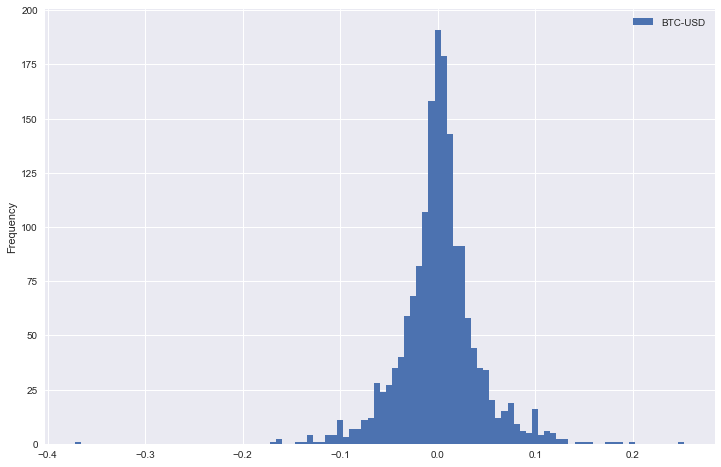

In [22]:
ret.plot(kind="hist", figsize = (12,8), bins=100)
plt.show()

In [27]:
daily_mean_ret = ret.mean()
print(daily_mean_ret, 'daily mean return')

## Finding out the variance of daily returns
var_daily_ret =ret.var()
print(var_daily_ret, 'return variance')

## Finding out the Standard Deviation
ret.std()

# Finding the annal mean return
ann_mean_ret = ret.mean() * 365
print(ann_mean_ret, 'annual mean return')

BTC-USD    0.001447
dtype: float64 daily mean return
BTC-USD    0.001673
dtype: float64 return variance
BTC-USD    0.528225
dtype: float64 annual mean return


In [28]:
btc

,BTC-USD
Date,
2017-11-09,7143.580078
2017-11-10,6618.140137
2017-11-11,6357.600098
2017-11-12,5950.069824
2017-11-13,6559.490234
...,...
2022-06-26,21027.294922
2022-06-27,20735.478516
2022-06-28,20280.634766


In [29]:
btc.shift(periods=1)

,BTC-USD
Date,
2017-11-09,NaN
2017-11-10,7143.580078
2017-11-11,6618.140137
2017-11-12,6357.600098
2017-11-13,5950.069824
...,...
2022-06-26,21502.337891
2022-06-27,21027.294922
2022-06-28,20735.478516


In [30]:
btc["lag1"] = btc.shift(periods = 1)

In [31]:
btc

,BTC-USD,lag1
Date,,
2017-11-09,7143.580078,NaN
2017-11-10,6618.140137,7143.580078
2017-11-11,6357.600098,6618.140137
2017-11-12,5950.069824,6357.600098
2017-11-13,6559.490234,5950.069824
...,...,...
2022-06-26,21027.294922,21502.337891
2022-06-27,20735.478516,21027.294922
2022-06-28,20280.634766,20735.478516


In [32]:
btc["Diff"] = btc.iloc[:,0].sub(btc.lag1)

In [33]:
btc

,BTC-USD,lag1,Diff
Date,,,
2017-11-09,7143.580078,NaN,NaN
2017-11-10,6618.140137,7143.580078,-525.439941
2017-11-11,6357.600098,6618.140137,-260.540039
2017-11-12,5950.069824,6357.600098,-407.530273
2017-11-13,6559.490234,5950.069824,609.420410
...,...,...,...
2022-06-26,21027.294922,21502.337891,-475.042969
2022-06-27,20735.478516,21027.294922,-291.816406
2022-06-28,20280.634766,20735.478516,-454.843750


The daily percent changes or returns given in the following


In [34]:
btc["pct_change"] = btc.iloc[:,0].div(btc.lag1).sub(1).mul(100) 
btc

,BTC-USD,lag1,Diff,pct_change
Date,,,,
2017-11-09,7143.580078,NaN,NaN,NaN
2017-11-10,6618.140137,7143.580078,-525.439941,-7.355415
2017-11-11,6357.600098,6618.140137,-260.540039,-3.936756
2017-11-12,5950.069824,6357.600098,-407.530273,-6.410128
2017-11-13,6559.490234,5950.069824,609.420410,10.242240
...,...,...,...,...
2022-06-26,21027.294922,21502.337891,-475.042969,-2.209262
2022-06-27,20735.478516,21027.294922,-291.816406,-1.387798
2022-06-28,20280.634766,20735.478516,-454.843750,-2.193553


In [35]:
btc["Diff2"] = btc.iloc[:,0].diff(periods=1)
btc

,BTC-USD,lag1,Diff,pct_change,Diff2
Date,,,,,
2017-11-09,7143.580078,NaN,NaN,NaN,NaN
2017-11-10,6618.140137,7143.580078,-525.439941,-7.355415,-525.439941
2017-11-11,6357.600098,6618.140137,-260.540039,-3.936756,-260.540039
2017-11-12,5950.069824,6357.600098,-407.530273,-6.410128,-407.530273
2017-11-13,6559.490234,5950.069824,609.420410,10.242240,609.420410
...,...,...,...,...,...
2022-06-26,21027.294922,21502.337891,-475.042969,-2.209262,-475.042969
2022-06-27,20735.478516,21027.294922,-291.816406,-1.387798,-291.816406
2022-06-28,20280.634766,20735.478516,-454.843750,-2.193553,-454.843750


In [36]:
btc["pct_change2"] = btc.iloc[:,0].pct_change(periods=1).mul(100)
btc

,BTC-USD,lag1,Diff,pct_change,Diff2,pct_change2
Date,,,,,,
2017-11-09,7143.580078,NaN,NaN,NaN,NaN,NaN
2017-11-10,6618.140137,7143.580078,-525.439941,-7.355415,-525.439941,-7.355415
2017-11-11,6357.600098,6618.140137,-260.540039,-3.936756,-260.540039,-3.936756
2017-11-12,5950.069824,6357.600098,-407.530273,-6.410128,-407.530273,-6.410128
2017-11-13,6559.490234,5950.069824,609.420410,10.242240,609.420410,10.242240
...,...,...,...,...,...,...
2022-06-26,21027.294922,21502.337891,-475.042969,-2.209262,-475.042969,-2.209262
2022-06-27,20735.478516,21027.294922,-291.816406,-1.387798,-291.816406,-1.387798
2022-06-28,20280.634766,20735.478516,-454.843750,-2.193553,-454.843750,-2.193553


Calculating Monthly change or return

In [37]:
btc.iloc[:,0].resample("M").last().pct_change(periods=1).mul(100)

Date
2017-11-30          NaN
2017-12-31    38.332561
2018-01-31   -27.798739
2018-02-28     1.729763
2018-03-31   -32.933289
2018-04-30    32.508931
2018-05-31   -18.899091
2018-06-30   -14.546907
2018-07-31    21.493441
2018-08-31    -9.547787
2018-09-30    -5.854570
2018-10-31    -4.647912
2018-11-30   -36.411576
2018-12-31    -6.834697
2019-01-31    -7.612357
2019-02-28    11.481101
2019-03-31     6.501501
2019-04-30    30.333730
2019-05-31    60.249302
2019-06-30    26.154911
2019-07-31    -6.762659
2019-08-31    -4.511012
2019-09-30   -13.880620
2019-10-31    10.920318
2019-11-30   -17.717702
2019-12-31    -4.967624
2020-01-31    29.984020
2020-02-29    -8.031850
2020-03-31   -25.127764
2020-04-30    34.477896
2020-05-31     9.268348
2020-06-30    -3.414686
2020-07-31    23.916341
2020-08-31     3.155867
2020-09-30    -7.673512
2020-10-31    27.785306
2020-11-30    42.412328
2020-12-31    47.773174
2021-01-31    14.180671
2021-02-28    36.308751
2021-03-31    30.531111
2021-04-30 

In [38]:
close.iloc[0]

BTC-USD    7143.580078
ETH-USD     320.884003
LTC-USD      64.269699
Name: 2017-11-09 00:00:00, dtype: float64

In [43]:
norm = close.div(close.iloc[0]).mul(100)

In [44]:
norm

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2017-11-09,100.000000,100.000000,100.000000
2017-11-10,92.644585,93.258931,92.205351
2017-11-11,88.997394,98.066902,96.940393
2017-11-12,83.292547,95.956167,91.809052
2017-11-13,91.823570,98.701088,95.529465
...,...,...,...
2022-06-26,294.352337,373.914454,88.496049
2022-06-27,290.267321,371.997561,87.016988
2022-06-28,283.900153,356.695633,82.171866


<function matplotlib.pyplot.show(close=None, block=None)>

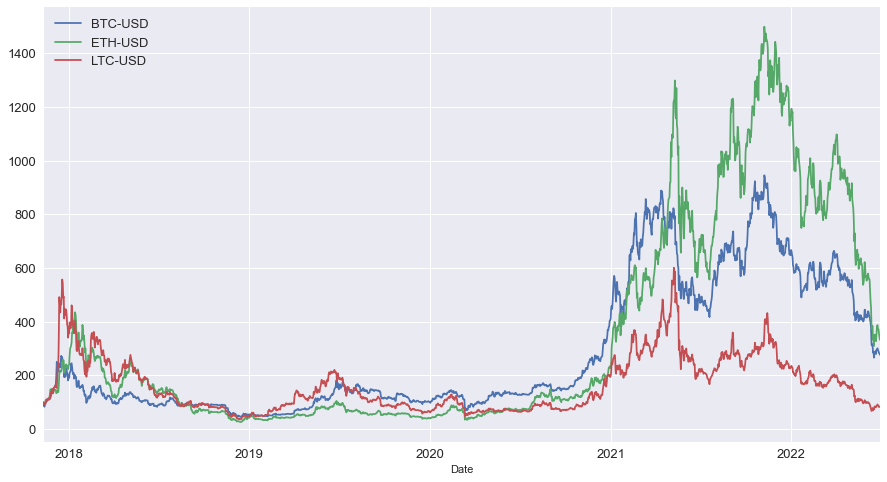

In [45]:
norm.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)
plt.show

In [48]:
# Return
ret = close.pct_change().dropna()
print(ret)

             BTC-USD   ETH-USD   LTC-USD
Date                                    
2017-11-10 -0.073554 -0.067411 -0.077946
2017-11-11 -0.039368  0.051555  0.051353
2017-11-12 -0.064101 -0.021523 -0.052933
2017-11-13  0.102422  0.028606  0.040523
2017-11-14  0.011626  0.066037  0.020899
...              ...       ...       ...
2022-06-26 -0.022093 -0.035076 -0.035506
2022-06-27 -0.013878 -0.005127 -0.016713
2022-06-28 -0.021936 -0.041134 -0.055680
2022-06-29 -0.008708 -0.039871  0.011568
2022-06-30 -0.015882 -0.028796  0.004228

[1694 rows x 3 columns]


In [49]:
ret.cov()

,BTC-USD,ETH-USD,LTC-USD
BTC-USD,0.001673,0.001605,0.001718
ETH-USD,0.001605,0.002625,0.002363
LTC-USD,0.001718,0.002363,0.003252


In [50]:
ret.corr()

,BTC-USD,ETH-USD,LTC-USD
BTC-USD,1.000000,0.765910,0.736703
ETH-USD,0.765910,1.000000,0.808672
LTC-USD,0.736703,0.808672,1.000000


In [54]:
import seaborn as sns

<AxesSubplot:>

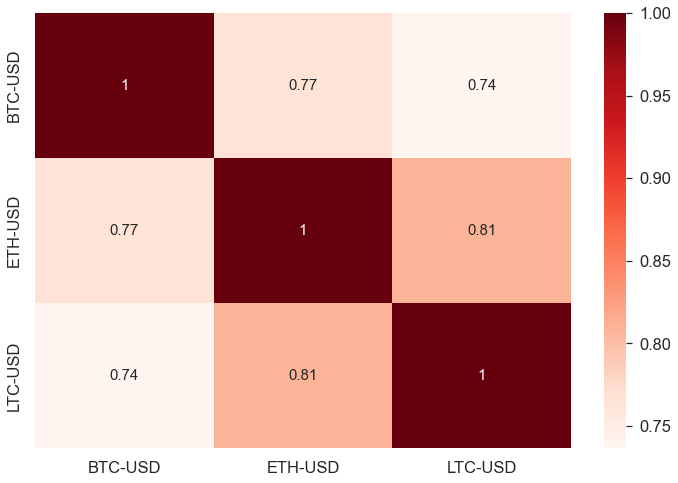

In [55]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax=1)

In [21]:
prices = [20, 21,21.5,19,22]
amount = 10
profit = 0

i = 0

while i < len(prices) - 1:
    print(prices[i+1], prices[i] )
    diff = (prices[i+1] - prices[i] ) / prices[i]
    profit += diff * amount
    # amount += profit
    i += 1

print(round(profit, 2))


21 20
21.5 21
19 21.5
22 19
1.15


In [22]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [23]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [23]:
from sklearn.metrics import mean_squared_error
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from datetime import date
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split


today = date.today()

# dd/mm/YY
d1 = today.strftime("%Y-%m-%d")

coin_set = yf.download(['BTC-USD'], start="2013-09-17", end=d1)
coin_set2 = coin_set.copy().dropna()

coin_set2['Close_Predict']=coin_set2[['Close']].shift(-30)

X = np.array(coin_set2[['Open','High','Low','Close','Volume']])
X = X[:-30]

y = np.array(coin_set2['Close_Predict'])
y = y[:-30]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }


def hyperparameter_tuning(space):
    model=xgb.XGBRegressor(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), 
                        gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']), 
                         min_child_weight=space['min_child_weight'],
                          colsample_bytree=space['colsample_bytree'])
    evaluation = [( X_train, y_train), ( X_test, y_test)]
   
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    mse= mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    #change the metric if you like
    return {'loss':mse, 'status': STATUS_OK, 'model': model}


trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

[*********************100%***********************]  1 of 1 completed
SCORE:                                                 
16158256.24811321                                      
  1%|          | 1/100 [00:01<03:01,  1.83s/trial, best loss: 16158256.24811321]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                          
15082236.026611777                                                              
  2%|▏         | 2/100 [00:02<01:34,  1.04trial/s, best loss: 15082236.026611777]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                           
14670673.519137887                                                               
SCORE:                                                                           
13444026.907472283                                                               
  4%|▍         | 4/100 [00:02<00:45,  2.13trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                           
15737909.055172356                                                               
SCORE:                                                                           
15802399.580183184                                                               
  6%|▌         | 6/100 [00:04<01:25,  1.10trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                           
14474169.52631391                                                                
  7%|▋         | 7/100 [00:05<01:28,  1.05trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                           
15825911.590097236                                                               
  8%|▊         | 8/100 [00:06<01:13,  1.25trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                           
15873355.47217847                                                                
SCORE:                                                                           
15300735.313293654                                                               
 10%|█         | 10/100 [00:11<02:19,  1.55s/trial, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14870627.114470545                                                                
SCORE:                                                                            
15573453.911671652                                                                
 11%|█         | 11/100 [00:12<02:04,  1.40s/trial, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
16966601.65949994                                                                 
 13%|█▎        | 13/100 [00:13<01:09,  1.25trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
16243284.399231534                                                                
 14%|█▍        | 14/100 [00:13<00:56,  1.53trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15459176.486378405                                                                
 15%|█▌        | 15/100 [00:13<00:49,  1.71trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14675236.354582656                                                                
 16%|█▌        | 16/100 [00:14<00:48,  1.75trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
16111584.156845713                                                                
 17%|█▋        | 17/100 [00:14<00:46,  1.80trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14996825.24071382                                                                 
SCORE:                                                                            
15160868.414870612                                                                
 19%|█▉        | 19/100 [00:15<00:33,  2.41trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14727012.008235857                                                                
 20%|██        | 20/100 [00:15<00:28,  2.76trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15995721.360353705                                                                
 21%|██        | 21/100 [00:16<00:28,  2.82trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15331105.679619057                                                                
 22%|██▏       | 22/100 [00:16<00:35,  2.23trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14160168.261372922                                                                
SCORE:                                                                            
15624150.95095523                                                                 
 24%|██▍       | 24/100 [00:17<00:30,  2.49trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14562808.940570762                                                                
SCORE:                                                                            
15240728.48429341                                                                 
 26%|██▌       | 26/100 [00:18<00:26,  2.81trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15882919.10579431                                                                 
 27%|██▋       | 27/100 [00:19<00:36,  1.99trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14131377.509139983                                                                
SCORE:                                                                            
16164665.53791449                                                                 
 29%|██▉       | 29/100 [00:19<00:28,  2.47trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15228982.519086076                                                                
SCORE:                                                                            
15653154.265792873                                                                
 31%|███       | 31/100 [00:20<00:23,  2.92trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14743374.367594989                                                                
 32%|███▏      | 32/100 [00:20<00:21,  3.14trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15814632.430434706                                                                
SCORE:                                                                            
15010309.609183405                                                                
 34%|███▍      | 34/100 [00:21<00:20,  3.23trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14844261.215742283                                                                
 35%|███▌      | 35/100 [00:21<00:17,  3.76trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15588764.779208282                                                                
SCORE:                                                                            
15498243.975075506                                                                
 37%|███▋      | 37/100 [00:21<00:14,  4.21trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15362700.46825825                                                                 
SCORE:                                                                            
15902430.596526502                                                                
 39%|███▉      | 39/100 [00:22<00:13,  4.49trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
13890833.057345882                                                                
SCORE:                                                                            
15333470.496427745                                                                
 41%|████      | 41/100 [00:22<00:14,  4.10trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14571685.778251957                                                                
 42%|████▏     | 42/100 [00:22<00:13,  4.38trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14860811.71023106                                                                 
 43%|████▎     | 43/100 [00:23<00:14,  3.96trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15840211.791430399                                                                
 44%|████▍     | 44/100 [00:23<00:16,  3.41trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15306657.773780966                                                                
SCORE:                                                                            
14893424.51666762                                                                 
 46%|████▌     | 46/100 [00:24<00:17,  3.08trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15833177.998855697                                                                
SCORE:                                                                            
14739101.76590077                                                                 
 48%|████▊     | 48/100 [00:24<00:16,  3.23trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
16295571.635147706                                                                
 49%|████▉     | 49/100 [00:25<00:16,  3.08trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15105507.53344857                                                                 
SCORE:                                                                            
15374782.025681134                                                                
 51%|█████     | 51/100 [00:26<00:16,  3.03trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14493652.977378968                                                                
 52%|█████▏    | 52/100 [00:26<00:20,  2.32trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14124108.305577943                                                                
 53%|█████▎    | 53/100 [00:27<00:26,  1.78trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15383057.56584787                                                                 
 54%|█████▍    | 54/100 [00:28<00:32,  1.43trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14630557.043983892                                                                
 55%|█████▌    | 55/100 [00:29<00:31,  1.45trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14599185.261353528                                                                
 56%|█████▌    | 56/100 [00:29<00:28,  1.53trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14620984.885270806                                                                
SCORE:                                                                            
15026187.41334055                                                                 
 58%|█████▊    | 58/100 [00:30<00:22,  1.90trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15859029.702088807                                                                
SCORE:                                                                            
14688800.31755713                                                                 
 60%|██████    | 60/100 [00:31<00:16,  2.39trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14731534.504356096                                                                
 61%|██████    | 61/100 [00:31<00:17,  2.29trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14676056.790235765                                                                
 62%|██████▏   | 62/100 [00:32<00:17,  2.23trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15072989.172743624                                                                
SCORE:                                                                            
15701882.482737562                                                                
 64%|██████▍   | 64/100 [00:33<00:15,  2.33trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15222609.870742546                                                                
SCORE:                                                                            
14124082.744356785                                                                
 66%|██████▌   | 66/100 [00:33<00:12,  2.76trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
13890834.5373035                                                                  
 67%|██████▋   | 67/100 [00:34<00:13,  2.42trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15151104.862146007                                                                
SCORE:                                                                            
14571077.73074379                                                                 
 69%|██████▉   | 69/100 [00:35<00:14,  2.19trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14478255.399738178                                                                
 70%|███████   | 70/100 [00:35<00:11,  2.57trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15642569.955826001                                                                
 70%|███████   | 70/100 [00:35<00:11,  2.57trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15952898.826988403                                                                
 72%|███████▏  | 72/100 [00:36<00:08,  3.17trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
13771687.908532834                                                                
 73%|███████▎  | 73/100 [00:36<00:08,  3.19trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14571038.53192498                                                                 
 74%|███████▍  | 74/100 [00:36<00:08,  3.21trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
15538044.173902992                                                                
SCORE:                                                                            
14723895.436068056                                                                
 76%|███████▌  | 76/100 [00:37<00:07,  3.22trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15173821.273074174                                                                
SCORE:                                                                            
14560865.00783403                                                                 
 78%|███████▊  | 78/100 [00:38<00:06,  3.23trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
16011653.096727852                                                                
 79%|███████▉  | 79/100 [00:39<00:15,  1.35trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
16030445.707731234                                                                
 80%|████████  | 80/100 [00:40<00:12,  1.56trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14477683.803635567                                                                
SCORE:                                                                            
15147579.684093403                                                                
 82%|████████▏ | 82/100 [00:40<00:08,  2.09trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
14540584.174595831                                                                
 83%|████████▎ | 83/100 [00:41<00:09,  1.84trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14687124.763813928                                                                
SCORE:                                                                            
15206057.017695077                                                                
 85%|████████▌ | 85/100 [00:42<00:06,  2.26trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
 85%|████████▌ | 85/100 [00:42<00:06,  2.26trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



15705349.270694682                                                                
SCORE:                                                                            
14555071.096147558                                                                
 87%|████████▋ | 87/100 [00:42<00:04,  2.89trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15962101.234992232                                                                
 88%|████████▊ | 88/100 [00:43<00:04,  2.89trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14816699.730533686                                                                
 89%|████████▉ | 89/100 [00:43<00:03,  2.98trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
16261540.270717477                                                                
SCORE:                                                                            
14212277.75784652                                                                 
 91%|█████████ | 91/100 [00:44<00:02,  3.05trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15833091.940580064                                                                
SCORE:                                                                            
15619301.029787654                                                                
 93%|█████████▎| 93/100 [00:44<00:02,  2.95trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
16080469.069324067                                                                
SCORE:                                                                            
14323810.041555576                                                                
 95%|█████████▌| 95/100 [00:45<00:01,  3.25trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
16898928.797740992                                                                
SCORE:                                                                            
15207476.640155498                                                                
 97%|█████████▋| 97/100 [00:46<00:00,  3.15trial/s, best loss: 13444026.907472283]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppi

SCORE:                                                                            
15268067.434257774                                                                


c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
13375522.435594222                                                                
 99%|█████████▉| 99/100 [00:46<00:00,  3.03trial/s, best loss: 13375522.435594222]

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\oriyomi\Anaconda3\envs\my_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
14886783.448707845                                                                
100%|██████████| 100/100 [00:47<00:00,  2.11trial/s, best loss: 13375522.435594222]
{'colsample_bytree': 0.7877187154112623, 'gamma': 4.751686814941894, 'max_depth': 5.0, 'min_child_weight': 5.0, 'reg_alpha': 47.0, 'reg_lambda': 0.20312582098075171}
